# Make sess class for each session and save as pickle

Currently uses info from sessions_dict.py to loop through sessions and create the sess class.

sess pickle files will be named `<scene>_<session>_<scan>.pickle`  \
and saved in `path_dict['preprocessed_root']/sess/<animal>/<date>`.

Set `overwrite` to `True` if you want to overwrite existing .pickle files. Otherwise, you will get an error that the file already exists.

In [1]:
overwrite = True

In [2]:
import os
import glob
import pickle
import numpy as np

import pandas as pd
# import InVivoDA_analyses
import social_int_analyses

# from InVivoDA_analyses import preprocessing as pp
from InVivoDA_analyses import utilities as ut

from social_int_analyses import utilities_ES as u
from social_int_analyses import sleap_utils as slp


import TwoPUtils
from TwoPUtils import preprocessing as pp

from suite2p.io.binary import BinaryFile
from PIL import Image
import PIL

import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

### Specify your path dictionary here.

In [3]:
from social_int_analyses.path_dict_esay import path_dictionary as path_dict
# options: path_dict_josquin, path_dict_msosamac
path_dict

{'preprocessed_root': 'C:/Users/esay/data/social_interaction',
 'sbx_root': 'Z:/giocomo/candong/social_interaction_data/calcium_imaging',
 'VR_Data': 'C:/Users/esay/data/social_interaction\\VRData',
 'git_repo_root': 'C:\\Users\\esay\\repos',
 'TwoPUtils': 'C:\\Users\\esay\\repos\\TwoPUtils',
 'home': 'C:\\Users\\esay',
 'fig_dir': 'Z:/giocomo/candong/social_interaction_data/calcium_imaging\\fig_scratch'}

In [4]:
from social_int_analyses.social_int_sess_deets import social_2P_sessions
from social_int_analyses.social_int_sess_deets import social_mice

In [7]:
mouse = social_mice[0]
d = social_2P_sessions[mouse][2]
print(d)

date, scene, session, scan = d['date'], d['scene'], d['session'], d['scan']
print(scene)

vrdir = path_dict['VR_Data']
basedir = os.path.join(path_dict['sbx_root'], mouse,date,scene)
stem =  os.path.join(basedir, f'{scene}_{session:03}_{scan:03}')
source_folder =  'C:/Users/esay/data/social_interaction/SLEAPData'

if 'diffsex' in scene:
    if 'unrestrict' in scene:
        basedir = os.path.join(path_dict['sbx_root'], mouse,date,'social_unrestrict_nov_diffgender')
        stem = os.path.join(basedir, 'social_unrestrict_nov_diffgender_'f'{session:03}_{scan:03}')
    else:
        basedir = os.path.join(path_dict['sbx_root'], mouse,date,'social_restrict_nov_diffgender')
        stem =os.path.join(basedir, 'social_restrict_nov_diffgender_'f'{session:03}_{scan:03}')

source_stem = os.path.join(source_folder, mouse, date, (scene +'.h5') )

d.update({'mouse': mouse ,
          
          'scan_file':stem + '.sbx',
          'scanheader_file': stem + '.mat',
          'vr_filename': os.path.join("C://Users/esay/data/social_interaction/VRData",mouse,date,"%s_%d.sqlite" %(scene,session)),
          'scan_number': scan,
          'prompt_for_keys': False,
          'VR_only': False,
          'scanner': "NLW",
          'n_channels':2,
          'n_planes':3
             })
source_stem

{'date': '03_10_2024', 'scene': 'social_restrict_fam', 'session': 1, 'scan': 5, 'exp_day': 2}
social_restrict_fam


'C:/Users/esay/data/social_interaction/SLEAPData\\social-0914-1\\03_10_2024\\social_restrict_fam.h5'

In [8]:
sess = TwoPUtils.sess.Session(**d)
sess.load_scan_info(sbx_version=3) #check sess.scan_info
sess.align_VR_to_2P()
# depends on vr being loaded already
sess.align_SLEAP_to_2P()
# sess.tunnel_data.shape, sess.vr_data.shape

Fixing teleports
frame rate 31.25
(16986,) ttl times,(3646,) ca2+ frame times
last time: VR 349.9699375, ca2+ 349.92
frame rate 31.25
(16986,) ttl times,(3646,) ca2+ frame times
last time: VR 349.9699375, ca2+ 349.92
(1823, 18) (1822, 18)
===filename===
C:/Users/esay/data/social_interaction/SLEAPData\social-0914-1\03_10_2024\social_restrict_fam.h5

===HDF5 datasets===
['edge_inds', 'edge_names', 'instance_scores', 'labels_path', 'node_names', 'point_scores', 'provenance', 'track_names', 'track_occupancy', 'tracking_scores', 'tracks', 'video_ind', 'video_path']



c:\users\esay\repos\twoputils\TwoPUtils\preprocessing.py:374: UserWarning: one frame correction
  warnings.warn('one frame correction')
c:\users\esay\repos\twoputils\TwoPUtils\preprocessing.py:374: UserWarning: one frame correction
  warnings.warn('one frame correction')


dict_keys(['locations', 'head_velocity', 'interaction', 'rightear_x', 'rightear_y', 'tailbase_x', 'tailbase_y', 'nose_x', 'nose_y', 'head_x', 'head_y', 'leftear_x', 'leftear_y', 'torso_x', 'torso_y'])
frame rate 31.25
(16986,) ttl times,(3646,) ca2+ frame times
last time: Tunnel 349.9699375, ca2+ 349.92


c:\users\esay\repos\twoputils\TwoPUtils\preprocessing.py:553: UserWarning: one frame correction
  warnings.warn('one frame correction')


In [9]:
TwoPUtils.sess.save_session(sess,'C:/Users/esay/data/social_interaction/SessPkls')

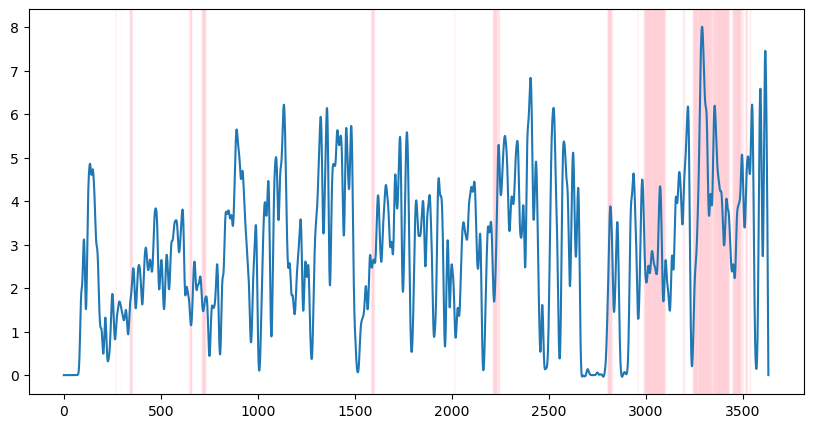

In [321]:
interaction = sess.tunnel_data['interaction']
plt.figure(figsize=(10,5))
for i in range(len(sess.tunnel_data['interaction'])):
    if interaction[i] ==1:
        plt.axvspan(i, i+1, color = 'pink', alpha=0.1)
# plt.plot(sess.tunnel_data['head_velocity'])
plt.plot(sess.vr_data['dz'])

In [145]:
def plot_dz_interaction(ax, sess):
    dz = sess.vr_data['dz']
    if isinstance(sess.tunnel_data, bool):
        interaction = None
    else:
        interaction = sess.tunnel_data['interaction']
        
    frames = np.arange(len(dz))
    ax.plot(frames, dz, label='dz',color='blue')
    # plt.figure(figsize=(10,5))
    # plt.plot(frames, dz, label='dz', color ='blue')

    if isinstance(sess.tunnel_data, bool):
        return 
    else:
        for i in range(len(interaction)):
            if interaction[i] ==1:
                ax.axvspan(i, i+1, color = 'pink', alpha=0.1)
    
    plt.xlabel("Frames")
    plt.ylabel("Running wheel dz")
    # plt.title("dz with interaction")
    # plt.legend()
    # plt.show()

In [64]:
sess.vr_data

time  morph  trialnum         pos        dz  posx  lick  reward  \
0       0.000   -1.0      -1.0 -500.000000  0.000000   0.0   0.0     0.0   
1       0.096   -1.0      -1.0 -500.000000  0.000000   0.0   0.0     0.0   
2       0.192   -1.0      -1.0 -500.000000  0.000000   0.0   0.0     0.0   
3       0.288   -1.0      -1.0 -500.000000  0.000000   0.0   0.0     0.0   
4       0.384   -1.0      -1.0 -500.000000  0.000000   0.0   0.0     0.0   
...       ...    ...       ...         ...       ...   ...   ...     ...   
8188  786.048    0.0      39.0  430.578370  1.394527   0.0   0.0     0.0   
8189  786.144    0.0      39.0  432.423659  1.106276   0.0   0.0     0.0   
8190  786.240    0.0      39.0  435.209786  0.769036   0.0   0.0     0.0   
8191  786.336    0.0      39.0  439.193077  0.394559   0.0   0.0     0.0   
8192  786.432    0.0      39.0  444.016919  0.000000   0.0   0.0     0.0   

      tstart  teleport  rzone  scanning  manrewards  autoreward  cmd  \
0        0.0       0.0    0.0      -1.0         0.0         0.0 -1.0   
1        0.0       0.0    0.0      -1.0         0.0         0.0 -1.0   
2        0.0       0.0    0.0      -1.0         0.0         0.0 -1.0   
3        0.0       0.0    0.0      -1.0         0.0         0.0 -1.0   
4        0.0       0.0    0.0      -1.0         0.0         0.0 -1.0   
...      ...       ...    ...       ...         ...         ...  ...   
8188     0.0       0.0    0.0       1.0         0.0         0.0  0.0   
8189     0.0       0.0    0.0       1.0         0.0         0.0  0.0   
8190     0.0       0.0    0.0       1.0         0.0         0.0  0.0   
8191     0.0       0.0    0.0       1.0         0.0         0.0  0.0   
8192     0.0       1.0    0.0       1.0         0.0         0.0  0.0   

      trainingtrack      speed  lick rate  
0               0.0   0.000000   0.000000  
1               0.0   0.000000   0.000000  
2               0.0   0.000000   0.000000  
3               0.0   0.000000   0.000000  
4               0.0   0.000000   0.000000  
...             ...        ...        ...  
8188            0.0  14.526324   0.003158  
8189            0.0  11.523708   0.001495  
8190            0.0   8.010789   0.000558  
8191            0.0   4.109986   0.000000  
8192            0.0   0.000000   0.000000  

[8193 rows x 18 columns]

In [66]:
sess.tunnel_data

False

In [336]:
import seaborn as sns

In [341]:
def plot_interaction_comparison(social_mice, social_2P_sessions):
    fam_interactions = []
    nov_interactions = []
    for mouse in social_mice:
        for day in range(len(social_2P_sessions[mouse])):
            d = social_2P_sessions[mouse][day]
            date, scene, session, scan = d['date'], d['scene'], d['session'], d['scan']
            pkldir = os.path.join('Z:/giocomo/esay/cd_project/social_interaction/SessPkls', mouse,  date, f'{scene}_{session}.pkl')
            print("Loading:", pkldir)
            with open(pkldir, 'rb') as file:
                sess = dill.load(file)
                
            if isinstance(sess.tunnel_data, bool):
                interaction = None
            else:
                
                num_interactions = np.sum(sess.tunnel_data['interaction'] == 1)
                if 'fam' in sess.scene:
                    fam_interactions.append(num_interactions)
                elif 'nov' in sess.scene:
                    nov_interactions.append(num_interactions)
                    
    data = {'Scene Type': ['fam'] * len(fam_interactions) + ['nov'] * len(nov_interactions),
            'Interactions': fam_interactions + nov_interactions}
    df = pd.DataFrame(data)
    plt.figure(figsize=(6, 6))
    colors = ['blue','purple']
    sns.barplot(x='Scene Type', y='Interactions', data=df,palette=colors)#, ci='sem', capsize=0.1, errcolor='black')
    sns.stripplot(x='Scene Type', y='Interactions', data=df, color='black', jitter=True, size=5)
    plt.xlabel("Scene Type")
    plt.ylabel("Number of Interaction Frames")
    plt.title("Comparison of Interaction Frames between Scene Types")
    plt.show()

Loading: Z:/giocomo/esay/cd_project/social_interaction/SessPkls\social-0914-1\03_10_2024\Env1_to_Env2_fixreward_1.pkl
Loading: Z:/giocomo/esay/cd_project/social_interaction/SessPkls\social-0914-1\03_10_2024\social_emptytunnel_1.pkl
Loading: Z:/giocomo/esay/cd_project/social_interaction/SessPkls\social-0914-1\03_10_2024\social_restrict_fam_1.pkl
Loading: Z:/giocomo/esay/cd_project/social_interaction/SessPkls\social-0914-1\03_10_2024\social_unrestrict_fam_1.pkl
Loading: Z:/giocomo/esay/cd_project/social_interaction/SessPkls\social-0914-1\03_10_2024\social_wheel_restrict_1.pkl
Loading: Z:/giocomo/esay/cd_project/social_interaction/SessPkls\social-0914-1\04_10_2024\Env1_to_Env2_fixreward_1.pkl
Loading: Z:/giocomo/esay/cd_project/social_interaction/SessPkls\social-0914-1\04_10_2024\social_restrict_fam_1.pkl
Loading: Z:/giocomo/esay/cd_project/social_interaction/SessPkls\social-0914-1\04_10_2024\social_restrict_nov_1.pkl
Loading: Z:/giocomo/esay/cd_project/social_interaction/SessPkls\social-

C:\Users\esay\AppData\Local\Temp\ipykernel_31980\4141914209.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Scene Type', y='Interactions', data=df,palette=colors)#, ci='sem', capsize=0.1, errcolor='black')


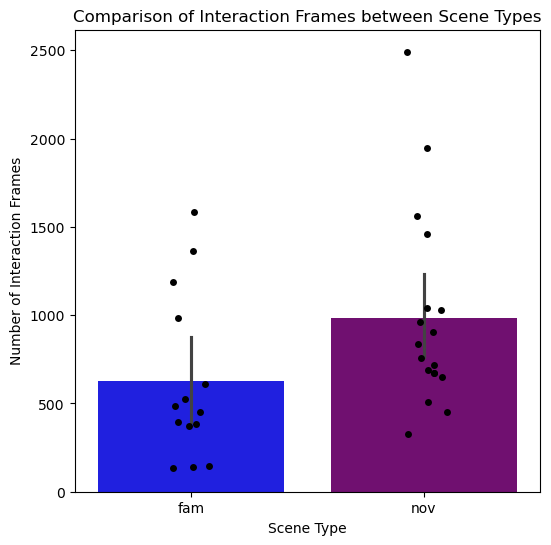

In [342]:
plot_interaction_comparison(social_mice, social_2P_sessions)

In [328]:
def visualize_multiple_sessions(social_mice, social_2P_sessions):
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))  # Adjust grid size as needed
    axes = axes.flatten()
    idx = 0
    for day in range(18):
        for mouse in social_mice[1:2]:
            if idx >=len(axes):
                break
            d = social_2P_sessions[mouse][day]
            date, scene, session, scan = d['date'], d['scene'], d['session'], d['scan']
            pkldir = os.path.join('Z:/giocomo/esay/cd_project/social_interaction/SessPkls', mouse,  date, f'{scene}_{session}.pkl')
            print("Loading:", pkldir)
            with open(pkldir, 'rb') as file:
                sess = dill.load(file)
            plot_dz_interaction(axes[idx],sess)
            axes[idx].set_title(f"{mouse},  {scene}")
            idx +=1
    plt.tight_layout()
    plt.show()

Loading: Z:/giocomo/esay/cd_project/social_interaction/SessPkls\social-0914-4\03_10_2024\Env1_to_Env2_fixreward_1.pkl
Loading: Z:/giocomo/esay/cd_project/social_interaction/SessPkls\social-0914-4\03_10_2024\social_emptytunnel_1.pkl
Loading: Z:/giocomo/esay/cd_project/social_interaction/SessPkls\social-0914-4\03_10_2024\social_restrict_fam_1.pkl
Loading: Z:/giocomo/esay/cd_project/social_interaction/SessPkls\social-0914-4\03_10_2024\social_unrestrict_fam_1.pkl
Loading: Z:/giocomo/esay/cd_project/social_interaction/SessPkls\social-0914-4\03_10_2024\social_wheel_restrict_1.pkl
Loading: Z:/giocomo/esay/cd_project/social_interaction/SessPkls\social-0914-4\04_10_2024\Env1_to_Env2_fixreward_1.pkl
Loading: Z:/giocomo/esay/cd_project/social_interaction/SessPkls\social-0914-4\04_10_2024\social_restrict_fam_1.pkl
Loading: Z:/giocomo/esay/cd_project/social_interaction/SessPkls\social-0914-4\04_10_2024\social_restrict_nov_1.pkl
Loading: Z:/giocomo/esay/cd_project/social_interaction/SessPkls\social-

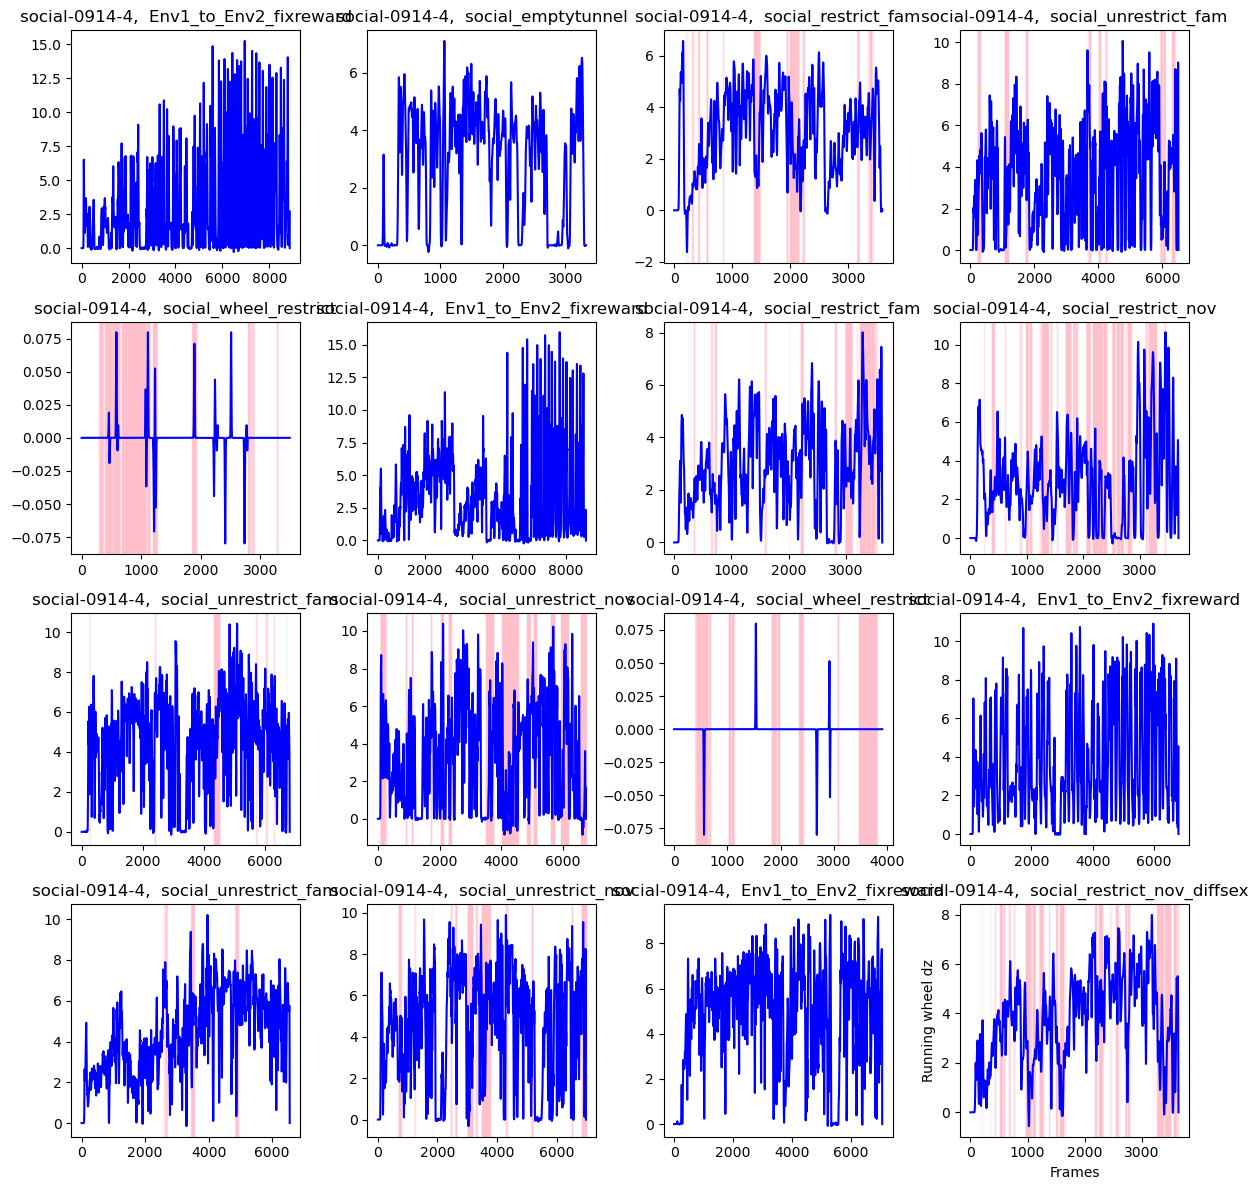

In [329]:
visualize_multiple_sessions(social_mice, social_2P_sessions)

In [322]:
import dill
mouse = social_mice[1]
d = social_2P_sessions[mouse][7]
date, scene, session, scan = d['date'], d['scene'], d['session'], d['scan']
# pkldir = os.path.join('Z:/giocomo/esay/cd_project/social_interaction/SessPkls', mouse,  date, f'{scene}_{session}.pkl')
pkldir = os.path.join('C:/Users/esay/data/social_interaction/SessPkls', mouse,  date, f'{scene}_{session}.pkl')

print(pkldir)

with open(pkldir, 'rb') as file:
    sess = dill.load(file)

C:/Users/esay/data/social_interaction/SessPkls\social-0914-4\04_10_2024\social_restrict_nov_1.pkl


In [323]:
sess.s2p_path = os.path.join("Z:/giocomo/candong/social_interaction_data/calcium_imaging", sess.mouse, sess.date)

In [179]:
sess.s2p_stats = os.path.join("Z:/giocomo/candong/social_interaction_data/calcium_imaging", sess.mouse, sess.date,"combined/suite2p/combined/stat.npy")

In [307]:
sess.s2p_path

'Z:/giocomo/candong/social_interaction_data/calcium_imaging\\social-0914-4\\04_10_2024'

In [325]:
sess.load_suite2p_data_multi_session(multi_sess=True)


Multiplane processing for 3 planes
Z:/giocomo/candong/social_interaction_data/calcium_imaging\social-0914-4\04_10_2024\combined\suite2p
Multiple sessions found in suite2p ops, current is  social_restrict_nov


UnpicklingError: invalid load key, '\x00'.

In [304]:
sess.scene

'Env1_to_Env2_fixreward'

In [317]:
TwoPUtils.sess.save_session(sess,'C:/Users/esay/data/social_interaction/SessPkls')

In [278]:
sess.s2p_path

'Z:/giocomo/candong/social_interaction_data/calcium_imaging\\social-0914-4\\04_10_2024'

In [290]:
sess.s2p_ops['data_path']

['/home/candong/oak/candong/social_interaction_data/calcium_imaging/social-0914-4/03_10_2024/Env1_to_Env2_fixreward',
 '/home/candong/oak/candong/social_interaction_data/calcium_imaging/social-0914-4/03_10_2024/social_restrict_nov',
 '/home/candong/oak/candong/social_interaction_data/calcium_imaging/social-0914-4/03_10_2024/social_unrestrict_nov',
 '/home/candong/oak/candong/social_interaction_data/calcium_imaging/social-0914-4/03_10_2024/social_restrict_fam',
 '/home/candong/oak/candong/social_interaction_data/calcium_imaging/social-0914-4/03_10_2024/social_unrestrict_fam',
 '/home/candong/oak/candong/social_interaction_data/calcium_imaging/social-0914-4/03_10_2024/social_wheel_restrict']

In [282]:
data_path = ['/home/candong/oak/candong/social_interaction_data/calcium_imaging/social-0914-4/03_10_2024/Env1_to_Env2_fixreward',
 '/home/candong/oak/candong/social_interaction_data/calcium_imaging/social-0914-4/03_10_2024/social_restrict_nov',
 '/home/candong/oak/candong/social_interaction_data/calcium_imaging/social-0914-4/03_10_2024/social_unrestrict_nov',
 '/home/candong/oak/candong/social_interaction_data/calcium_imaging/social-0914-4/03_10_2024/social_restrict_fam',
 '/home/candong/oak/candong/social_interaction_data/calcium_imaging/social-0914-4/03_10_2024/social_unrestrict_fam',
 '/home/candong/oak/candong/social_interaction_data/calcium_imaging/social-0914-4/03_10_2024/social_wheel_restrict']

In [288]:
ops = TwoPUtils.s2p.set_ops(d={'save_path0': 'Z:/giocomo/candong/social_interaction_data/calcium_imaging/social-0914-4\\04_10_2024\\Env1_to_Env2_fixreward\\Env1_to_Env2_fixreward_001_001',
                        'data_path': data_path,
                       'save_path0': fullpath,
                       'fast_disk':[],
                       'move_bin':True,
                       'two_step_registration':True,
                       'maxregshiftNR':10,
                       'nchannels':2,
                       'tau': 0.7,
                       'functional_chan':1,
                        'align_by_chan' : 1,
                       'nimg_init': 2000,
                       'fs':info['frame_rate'],
                       'roidetect':True,
                       'input_format':"h5", #h5
                       'h5py_key':'data',
                       'sparse_mode':True,
                       'threshold_scaling':.8, #.6
                        'sbx_ndeadcols': 100,
                        'nplanes':nplanes})